# Genetic Algorithm Tessellation
In this notebook, we'll use genetic algorithms to create tessellations!

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("..") # Move execution to root dir

In [19]:
from enum import Enum, auto
from typing import Callable, Iterator, Optional

import numpy as np
from matplotlib import pyplot as plt 
from leap_ec import ops, probe
from leap_ec.algorithm import generational_ea
from leap_ec.representation import Representation

from tessellation.draw import MPLDrawer
from tessellation.procgen.generator import ALL_ACTIONS, Action, Generator 
from tessellation.procgen.ga.genome import TessellationDecoder
from tessellation.procgen.ga.heuristics import count_number_points_heuristic
from tessellation.procgen.ga.mutate import apply_mutation, substitute_action, insert_action, delete_action
from tessellation.procgen.ga.problem import TessellationProblem, initialize_genome

## Configuration

In [8]:
# Proc gen constants
SEED = 32
SIDE_LEN = 100

# Genetic Algorithm config
SIDE_LEN = 100
SUBSTITUTION_PROB, INSERTION_PROB, DELETION_PROB = 0.1, 0.1, 0.1
POP_SIZE = 10
MAX_GENERATIONS = 20

# Draw config
CMAP = "gray"
drawer = MPLDrawer(CMAP)    

## Genetic Algorithm Tessellation
We'll be using the LEAP package for our genetic algorithms.

### Simple test
Let's start by trying out the simplest form of GA - simple real-valued function optimization.

In [4]:
from leap_ec.simple import ea_solve

def f(x):
    """A real-valued function to optimized."""
    return sum(x)**2

ea_solve(f, bounds=[(-5.12, 5.12) for _ in range(5)], maximize=True)

step,bsf
0,235.96881799710386
1,314.6478976795169
2,332.10627982011357
3,425.1559436491242
4,425.1559436491242
5,425.1559436491242
6,425.1559436491242
7,460.96525938761755
8,510.5938606062562
9,549.338808136687
10,549.338808136687
11,549.338808136687
12,598.348566248481
13,633.4864072240405
14,633.4864072240405
15,633.4864072240405
16,633.4864072240405
17,633.4864072240405
18,633.4864072240405
19,633.4864072240405
20,633.4864072240405
21,637.790966519123
22,637.790966519123
23,637.790966519123
24,637.790966519123
25,637.790966519123
26,645.5270107921353
27,645.5270107921353
28,654.1006608316977
29,654.1006608316977
30,654.1006608316977
31,654.1006608316977
32,654.1006608316977
33,654.1006608316977
34,654.1006608316977
35,654.1006608316977
36,654.1006608316977
37,654.1006608316977
38,654.1006608316977
39,654.1006608316977
40,654.1006608316977
41,654.1006608316977
42,654.1006608316977
43,654.1006608316977
44,654.1006608316977
45,654.1006608316977
46,654.1006608316977
47,654.1006608316977

array([-5.12, -5.12, -5.12, -5.12, -5.12])

### Build out Genetic Algorithm

In [9]:
problem = TessellationProblem(
    heuristic_fns=[count_number_points_heuristic], side_len=SIDE_LEN
)

representation = Representation(
    decoder=TessellationDecoder(),
    initialize=lambda: initialize_genome(problem) 
)
mutator = Mutator(
    substitution_prob=SUBSTITUTION_PROB,
    insertion_prob=INSERTION_PROB,
    deletion_prob=DELETION_PROB,
)

In [20]:
final_pop = generational_ea(
    max_generations=MAX_GENERATIONS, 
    pop_size=POP_SIZE,
    problem=problem,
    representation=representation,

    # The operator pipeline
    pipeline=[
        # Select parents via tournament_selection selection
        ops.tournament_selection,
        
        ops.clone,  # Copy them (just to be safe)
        
        lambda individual_iterator: mutator.apply_mutation(mutator.substitute_action, individual_iterator),
        lambda individual_iterator: mutator.apply_mutation(mutator.insert_action, individual_iterator),
        lambda individual_iterator: mutator.apply_mutation(mutator.delete_action, individual_iterator),
        
        # Crossover with a 40% chance of swapping each gene
        # ops.UniformCrossover(p_swap=0.4),
        
        ops.evaluate,  # Evaluate fitness
        
        # Collect offspring into a new population
        ops.pool(size=POP_SIZE),
        
        probe.BestSoFarProbe()  # Print the BSF
    ]
)

step,bsf
0,[104.]
1,[105.]
2,[105.]
3,[109.]
4,[109.]
5,[112.]
6,[115.]
7,[116.]
8,[120.]
9,[120.]
10,[120.]
11,[127.]
12,[128.]
13,[128.]
14,[129.]
15,[129.]
16,[136.]
17,[136.]
18,[139.]
19,[141.]


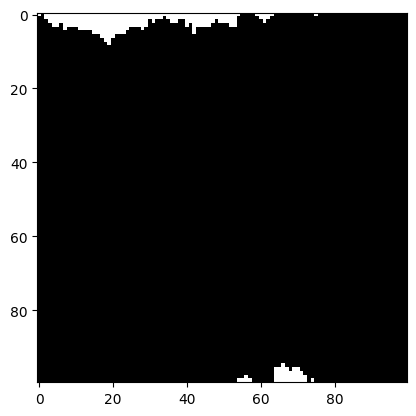

Press 'q' to quit, anything else to continue...


In [ ]:
from IPython.display import clear_output

for individual in final_pop:
    genome = individual.genome
    mask = np.zeros((SIDE_LEN, SIDE_LEN))
    mask = Generator._draw_line(mask, genome.start_point, genome.actions)

    drawer.draw(mask)
    plt.show()
    print("Press 'q' to quit, anything else to continue...")
    user_action = input()
    

    if user_action.lower() == "q":
        break
    clear_output()
    